In [1]:
## 나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
# 폰트지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [3]:
# import
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# csv파일 불러오기
training = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic/test.csv')

In [6]:
# 훈련데이터와 시험데이터 결합
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

# **Data Exploration**

In [7]:
# 훈련데이터 정보 확인 
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [8]:
# 컬럼명 변경
training.rename(columns={'PassengerId':'승객ID', 'Survived':'생존여부', 'Pclass':'클래스', 'Name':'이름', 'Sex':'성별', 'Age':'나이', 'SibSp':'동승자수', 'Parch':'부모/자녀수', 'Ticket':'티켓번호', 'Fare':'요금', 'Cabin':'선실번호', 'Embarked':'승선지'}, inplace=True)

In [9]:
# 수치로 된 것들의 통계 확인
training.describe() 

,승객ID,생존여부,클래스,나이,동승자수,부모/자녀수,요금,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [10]:
# 성별의 데이터 값 확인
training['성별'].value_counts() 

male      577
female    314
Name: 성별, dtype: int64

In [11]:
# 선실번호의 데이터 값 확인
training['선실번호'].value_counts() 

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
D              3
              ..
D37            1
C85            1
A26            1
B69            1
B42            1
Name: 선실번호, Length: 147, dtype: int64

In [12]:
# 승선지의 데이터 값 확인
training['승선지'].value_counts() 

S    644
C    168
Q     77
Name: 승선지, dtype: int64

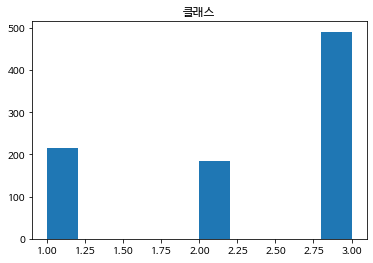

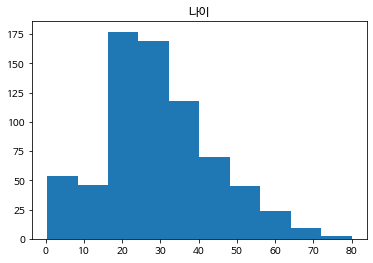

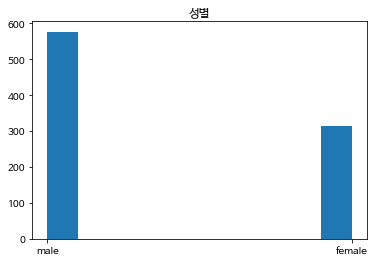

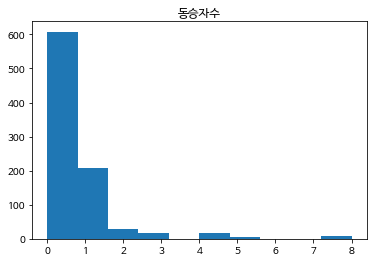

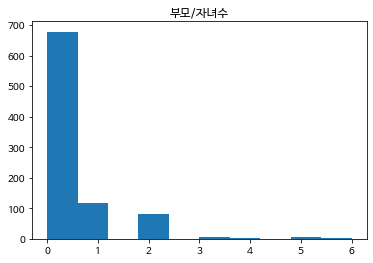

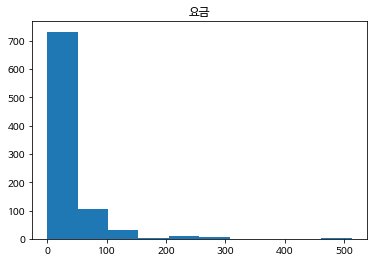

In [13]:
## 히스토그램으로 보기
df_num = training[['클래스', '나이', '성별', '동승자수', '부모/자녀수', '요금']]
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()
    print('\n')


             클래스        나이      동승자수    부모/자녀수        요금
클래스     1.000000 -0.369226  0.083081  0.018443 -0.549500
나이     -0.369226  1.000000 -0.308247 -0.189119  0.096067
동승자수    0.083081 -0.308247  1.000000  0.414838  0.159651
부모/자녀수  0.018443 -0.189119  0.414838  1.000000  0.216225
요금     -0.549500  0.096067  0.159651  0.216225  1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


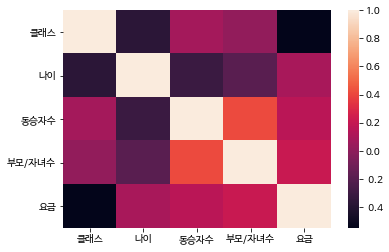

In [14]:
## 히트맵으로 보기
print(df_num.corr())
sns.heatmap(df_num.corr())

In [15]:
## 피봇 테이블 보기
pd.pivot_table(training, index = '생존여부', values = ['클래스', '나이','동승자수','부모/자녀수','요금'])

,나이,동승자수,부모/자녀수,요금,클래스
생존여부,,,,,
0,30.626179,0.553734,0.329690,22.117887,2.531876
1,28.343690,0.473684,0.464912,48.395408,1.950292


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


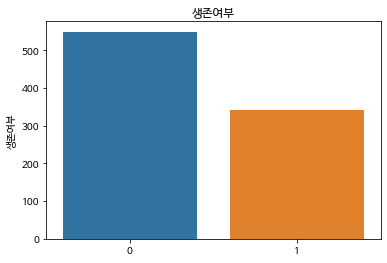

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


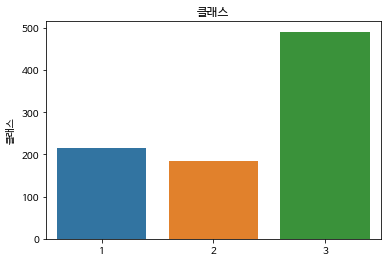

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


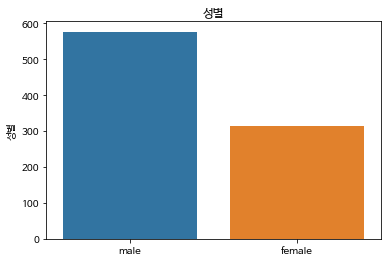

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


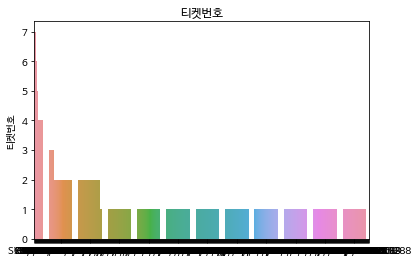

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


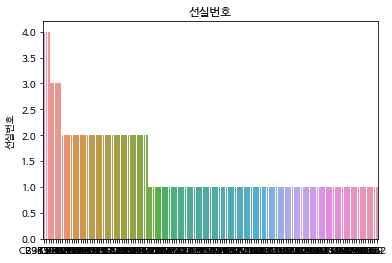

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


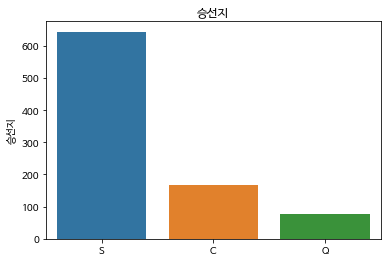

In [16]:
## 막대그래프 보기
df_cat = training[['생존여부','클래스','성별','티켓번호','선실번호','승선지']]
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()
    print('\n')


In [17]:
# 피봇테이블 보기
print(pd.pivot_table(training, index = '생존여부', columns = '클래스', values = '승객ID' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = '생존여부', columns = '성별', values = '승객ID' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = '생존여부', columns = '승선지', values = '승객ID' ,aggfunc ='count'))

클래스     1   2    3
생존여부              
0      80  97  372
1     136  87  119

성별    female  male
생존여부              
0         81   468
1        233   109

승선지    C   Q    S
생존여부             
0     75  47  427
1     93  30  217


# **Feature Engineering**

In [18]:
## 동일인이 예약한 선실의 수와 생존여부의 관계(* 0은 Null)
training['cabin_multiple'] = training['선실번호'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [19]:
pd.pivot_table(training, index = '생존여부', columns = 'cabin_multiple', values = '승객ID' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
생존여부,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [20]:
## 선실번호와 생존여부의 관계(* n은 Null)
training['cabin_adv'] = training['선실번호'].apply(lambda x: str(x)[0])
training.cabin_adv.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [21]:
pd.pivot_table(training,index='생존여부',columns='cabin_adv', values = '승객ID', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
생존여부,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [22]:
## 티켓번호와 생존여부의 관계
training['numeric_ticket'] = training['티켓번호'].apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training['티켓번호'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [23]:
pd.pivot_table(training,index='생존여부',columns='ticket_letters', values = '티켓번호', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,pc,pp,ppp,sc,sca4,scah,scahbasle,scow,scparis,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
생존여부,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,21.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,6.0,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,39.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,5.0,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [24]:
## 이름과 생존여부의 관계
training['name_title'] = training['이름'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Mme               1
Jonkheer          1
the Countess      1
Ms                1
Don               1
Capt              1
Sir               1
Name: name_title, dtype: int64

In [25]:
pd.pivot_table(training,index='생존여부',columns='name_title', values = '티켓번호', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
생존여부,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


## **Data Preprocessing for Model**

In [26]:
# 위의 작업을 시험데이터를 포함한 전체 데이터에 적용
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [27]:
# 전체 데이터에서 나이와 요금이 Null인 경우, 훈련데이터의 중위수를 적용
all_data.Age = all_data.Age.fillna(training['나이'].median())
all_data.Fare = all_data.Fare.fillna(training['나이'].median())

In [28]:
# 승선지가 없는 행은 삭제(2건 밖에 없음)
all_data.dropna(subset=['Embarked'],inplace = True)

In [29]:
# 티켓번호를 문자열로 변환
all_data.Pclass = all_data.Pclass.astype(str)

In [30]:
# 더미 생성
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])
all_dummies

,Age,SibSp,Parch,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dona,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,38.0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,26.0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,35.0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,35.0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
414,39.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
415,38.5,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
416,28.0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
